<a href="https://colab.research.google.com/github/vnmrsharma/CANIS/blob/main/Canis_hackathon_notebook_lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CANIS hackathon notebook

## Import libraries and modules

In [ ]:
import pandas as pd

# !pip install -q tensorflow-model-optimization

import tempfile
import os
import time

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

from tensorflow import keras

# import pillow
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
combined_df = pd.read_csv("/content/drive/MyDrive/Canis_hackathon/Cleaned.csv")

In [ ]:
# true_df = pd.read_csv("/content/drive/MyDrive/Canis_hackathon/DataSet_Misinfo_TRUE.csv")
# fake_df = pd.read_csv("/content/drive/MyDrive/Canis_hackathon/DataSet_Misinfo_FAKE.csv")

# display(true_df)
# display(fake_df)

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...
...,...,...
34970,34970,Most conservatives who oppose marriage equalit...
34971,34971,The freshman senator from Georgia quoted scrip...
34972,34972,The State Department told the Republican Natio...
34973,34973,"ADDIS ABABA, Ethiopia —President Obama convene..."


,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...
...,...,...
43637,44422,The USA wants to divide Syria.\r\n\r\nGreat Br...
43638,44423,The Ukrainian coup d'etat cost the US nothing ...
43639,44424,The European Parliament falsifies history by d...
43640,44425,The European Parliament falsifies history by d...


## Data cleaning

In [ ]:
# true_df = true_df.drop('Unnamed: 0',axis=1)
# true_df["label"] = 1

# display(true_df)

,text,label
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1
...,...,...
34970,Most conservatives who oppose marriage equalit...,1
34971,The freshman senator from Georgia quoted scrip...,1
34972,The State Department told the Republican Natio...,1
34973,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [ ]:
# fake_df = fake_df.drop('Unnamed: 0',axis=1)
# fake_df["label"] = 0

# display(fake_df)

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
43637,The USA wants to divide Syria.\r\n\r\nGreat Br...,0
43638,The Ukrainian coup d'etat cost the US nothing ...,0
43639,The European Parliament falsifies history by d...,0
43640,The European Parliament falsifies history by d...,0


## Data segmentation/classification

### Word clouds


word clouds for the true dataset

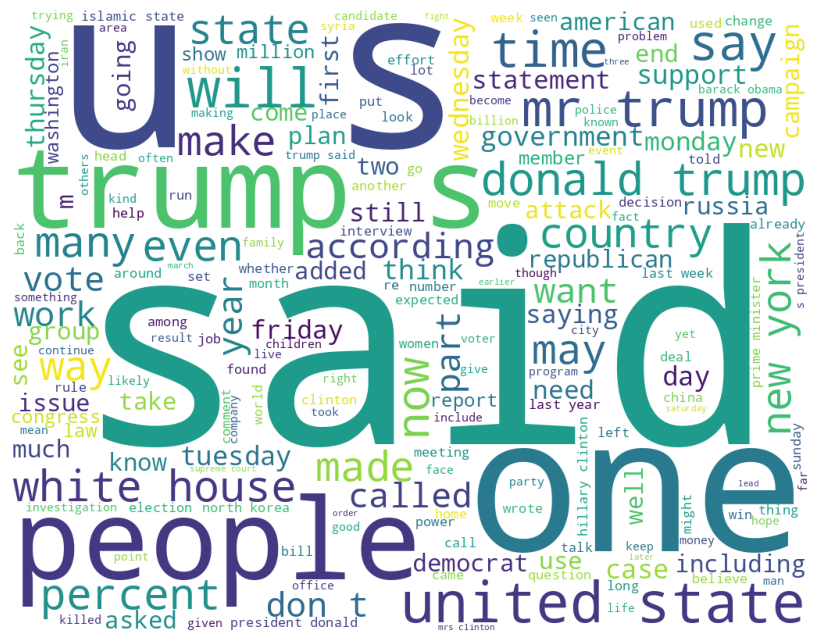

In [ ]:
# comment_words = ''
# stopwords = set(STOPWORDS)
 
# # iterate through the csv file
# for val in combined_df.text:
     
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
# wordcloud = WordCloud(width = 1024, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                      
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
# plt.show()

## Sentiment analysis

In [ ]:
!pip install pysentimiento
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 

### Data preprocessing for sentiment analysis

In [ ]:
# preprocess_tweet("📢 @Helooooooooooooo this is #BreakingNews")

'emoji altavoz de mano emoji  @usuarioo this is hashtag breaking news'

In [ ]:
# x = preprocess_tweet("I like Elon Musk soooooooooooo muchhhhhhhhhhhhhh!!!!!!!!!!!")
# print(x)

I like Elon Musk sooo muchhh!!!


In [ ]:
# true_df["preprocessed"] = combined_df["text"].apply(lambda x: preprocess_tweet(str(x)))

# display(true_df)

,text,label,preprocessed
0,The head of a conservative Republican faction ...,1,The head of a conservative Republican faction ...
1,Transgender people will be allowed for the fir...,1,Transgender people will be allowed for the fir...
2,The special counsel investigation of links bet...,1,The special counsel investigation of links bet...
3,Trump campaign adviser George Papadopoulos tol...,1,Trump campaign adviser George Papadopoulos tol...
4,President Donald Trump called on the U.S. Post...,1,President Donald Trump called on the U.S. Post...
...,...,...,...
34970,Most conservatives who oppose marriage equalit...,1,Most conservatives who oppose marriage equalit...
34971,The freshman senator from Georgia quoted scrip...,1,The freshman senator from Georgia quoted scrip...
34972,The State Department told the Republican Natio...,1,The State Department told the Republican Natio...
34973,"ADDIS ABABA, Ethiopia —President Obama convene...",1,"ADDIS ABABA, Ethiopia President Obama convened..."


## Sentiment analysis column

In [ ]:
sentiment_analyzer = create_analyzer(task="sentiment", lang="en")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
x = sentiment_analyzer.predict("I like Elon Musk")
print(x)

AnalyzerOutput(output=POS, probas={POS: 0.971, NEU: 0.028, NEG: 0.002})


In [ ]:

combined_df["sentiment_analysis"] = combined_df["text"].apply(lambda x: sentiment_analyzer.predict(x).output)
display(combined_df)

## Emotion analysis

In [ ]:
emotion_analyzer = create_analyzer(task="emotion", lang="en")

In [ ]:
combined_df["sentiment_analysis"] = combined_df["text"].apply(lambda x: emotion_analyzer.predict(x).output)
display(combined_df)

In [ ]:
combined_df.to_csv("/content/drive/MyDrive/Canis_hackathon/Cleaned_1.csv")

## Hate speech analysis

In [ ]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="en")

In [ ]:
combined_df["hate_speech_analysis"] = combined_df["text"].apply(lambda x: hate_speech_analyzer.predict(x).output)
display(combined_df)

##Location information

In [ ]:
import pycountry

In [ ]:
def get_country(text_list):

  for word in text_list:

    for country in pycountry.countries:
      if country.name in word:
          return country.name
  
  return None

In [ ]:
combined_df["location"] = combined_df["text"].apply(lambda x: for word in x in pycountry.countries)
display(combined_df)

## Data model implementation

## Data model evaluation

## Data model infographics compilation